✅ Dataset Loaded Successfully
Dataset Shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229



Columns in Dataset:
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
✅ All required columns found


/tmp/ipython-input-2634028218.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,City,Cuisines,Price range,Votes,Aggregate rating
0,Makati City,"French, Japanese, Desserts",3,314,4.8
1,Makati City,Japanese,3,591,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4,270,4.4
3,Mandaluyong City,"Japanese, Sushi",4,365,4.9
4,Mandaluyong City,"Japanese, Korean",4,229,4.8



✅ Model Training Completed

📊 MODEL EVALUATION
Mean Squared Error (MSE): 1.7398475777924791
R² Score: 0.23560445251090056


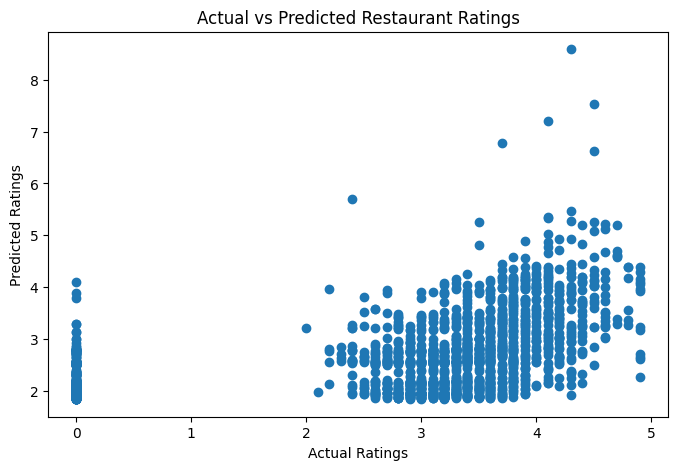


📌 Feature Importance


,Feature,Coefficient
0,City,-0.005265
1,Cuisines,-0.000205
2,Price range,0.620518
3,Votes,0.000682



✅ CONCLUSION:
The Linear Regression model successfully predicts restaurant ratings using the given dataset.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
feature_importance['Coefficient'].plot(kind='hist', bins=20, title='Coefficient')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
feature_importance.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
feature_importance['Coefficient'].plot(kind='line', figsize=(8, 4), title='Coefficient')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(feature_importance['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(feature_importance, x='Coefficient', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:

# TASK 1: RESTAURANT RATING PREDICTION
# DATASET: PRE-UPLOADED (/mnt/data/Dataset .csv)

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset (NO UPLOAD REQUIRED)
file_path = "/Dataset .csv"
df = pd.read_csv(file_path)

print(" Dataset Loaded Successfully")
print("Dataset Shape:", df.shape)
display(df.head())

# 3. Clean Column Names (IMPORTANT)
df.columns = df.columns.str.strip()
print("\nColumns in Dataset:")
print(df.columns)

# 4. Handle Missing Values
df.fillna(method='ffill', inplace=True)

# 5. Select Required Columns (SAFE METHOD)
required_columns = [
    'City',
    'Cuisines',
    'Price range',
    'Votes',
    'Aggregate rating'
]

# Check missing columns
missing = [col for col in required_columns if col not in df.columns]
if missing:
    print(" Missing Columns:", missing)
else:
    print("All required columns found")

df = df[required_columns]
display(df.head())

# 6. Encode Categorical Columns

le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['Cuisines'] = le.fit_transform(df['Cuisines'])

# 7. Split Features & Target

X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 9. Train Model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)
print("\n Model Training Completed")

# 10. Prediction
y_pred = model.predict(X_test)

# 11. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n MODEL EVALUATION")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# 12. Visualization
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Restaurant Ratings")
plt.show()
--
# 13. Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\n📌 Feature Importance")
display(feature_importance)

# 14. Final Conclusion
print("\n CONCLUSION:")
print("The Linear Regression model successfully predicts restaurant ratings using the given dataset.")
